In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df= pd.read_csv('Titanic-Dataset.csv')

In [98]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<div style="font-family: 'Comic Sans MS'; font-size: 18px; color:Blue;">
Removing rows that has null values from age since its few and removing cabin column as it contains many null values and its not useful for us during analysis.
</div>



In [99]:
df.dropna()
df.drop('Cabin', axis=1, inplace=True)


<div style="font-family: 'Comic Sans MS'; font-size: 18px; color: blue;">
This plot indicates ratio of passengers mounted from different ports such as majority population especially males mounted from southampton and very few mounted from queenstown.
</div>

Text(0.5, 1.0, 'Distribution according to ports')

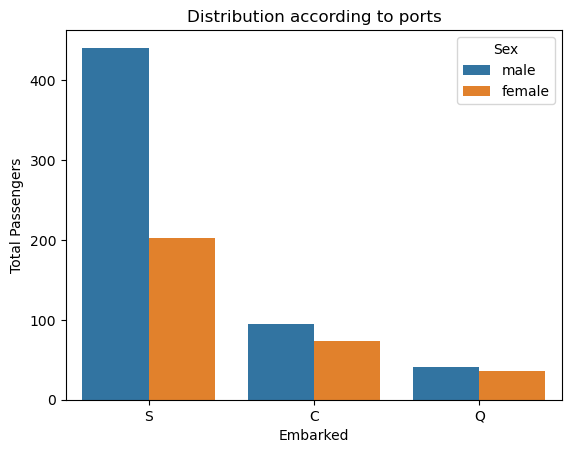

In [100]:
sns.countplot(x='Embarked', hue='Sex' ,data=df)
plt.ylabel('Total Passengers')
plt.title('Distribution according to ports')

<div style="font-family: 'Comic Sans MS'; font-size: 18px; color: blue;">
Since we have to check total family members of each passenger that is also on board so we merge both sibling/spouse and parents/children column and sum it up for each passenger from which we get to know the majority passengers are travelling alone.
</div>

Text(0.5, 1.0, 'Passengers with number of their family members on board')

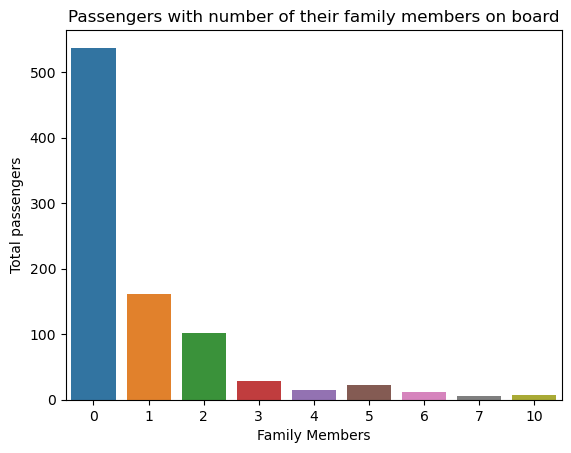

In [101]:
df['Family Members']= df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace= True)

sns.countplot(x='Family Members', data=df)
plt.ylabel('Total passengers')
plt.title('Passengers with number of their family members on board')

<div style="font-family: 'Comic Sans MS'; font-size: 18px; color: blue;">
This plot shows the ratio between males and females that survived or not. No wonder we saw titanic movie and captain announces "Women and children first" as we can see majority male died.
</div>

Text(0.5, 0, 'Status')

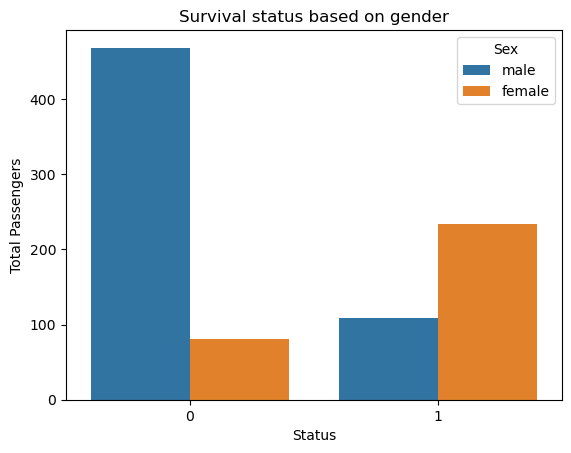

In [102]:
sns.countplot(x='Survived', data=df, hue='Sex')
plt.title('Survival status based on gender')
plt.ylabel('Total Passengers')
plt.xlabel('Status')

<div style="font-family: 'Comic Sans MS'; font-size: 18px; color: blue;">
This plot shows the ratio of passengers survived based on their passenger class. We can clearly observe, the higher your pclass the more chances you had to survive as majority died belongs to pclass 3.
</div>

Text(0.5, 1.0, 'Survival status based on class')

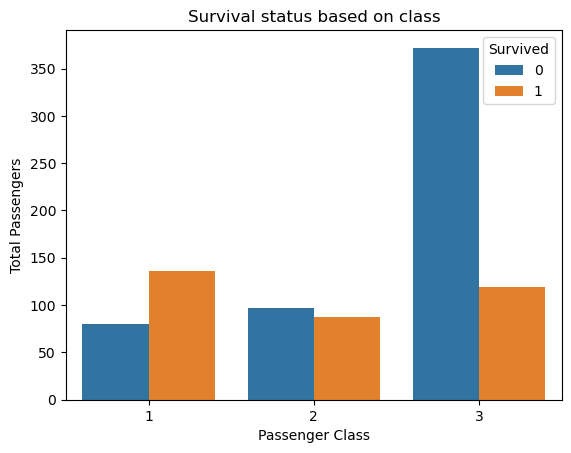

In [103]:
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Total Passengers')
plt.title('Survival status based on class')

<div style="font-family: 'Comic Sans MS'; font-size: 18px; color: blue;">
Although we have age group but seeing each age is time-costing so categorizing it into two main groups of youth and senior citizen because children won't register themselves. We can see that majority of youth died as compare to senior citizens. 
</div>

Text(0.5, 1.0, 'Survival status based on age-group')

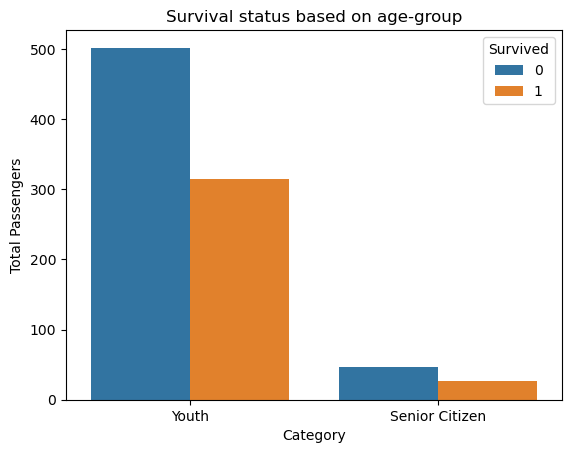

In [104]:
df['Category'] = np.where(df['Age'] >= 50, 'Senior Citizen', 'Youth')
sns.countplot(x='Category', hue='Survived', data=df)
plt.ylabel('Total Passengers')
plt.title('Survival status based on age-group')